In [52]:
#adding in new genes to analysis 22q11.2

In [53]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [54]:
cd ../Data/Genemaps

[Errno 2] No such file or directory: '../Data/Genemaps'
/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [55]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [56]:
#load in cmat data
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_mu.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [57]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [58]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
37


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 37/37 [00:03<00:00,  9.40it/s]


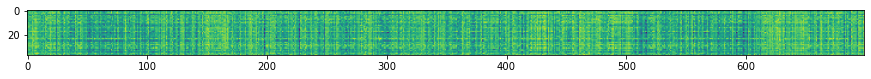

In [60]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [61]:
gene_fmri_corr.shape

(37, 699)

In [62]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_total = ~np.isnan(Y_total)[:,col_id]
Y_use_total = Y_total[good_subjects_total,col_id] 
X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()
regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 
Y_use_hat_total = linear_regression_total.predict(X_use_total)

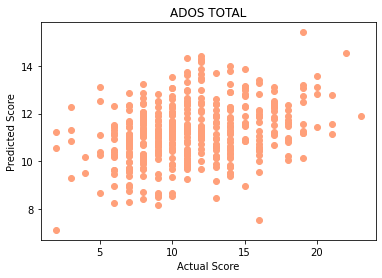

In [63]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='lightsalmon')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [64]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

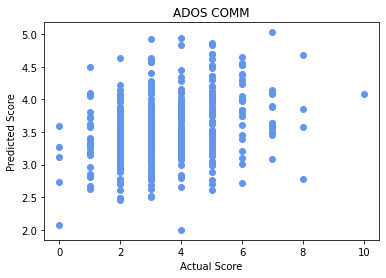

In [65]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='cornflowerblue')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [66]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

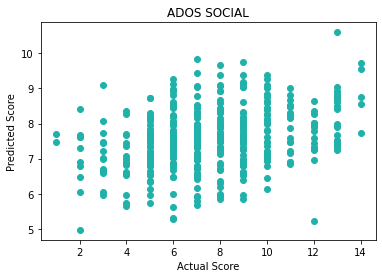

In [67]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='lightseagreen')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [68]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

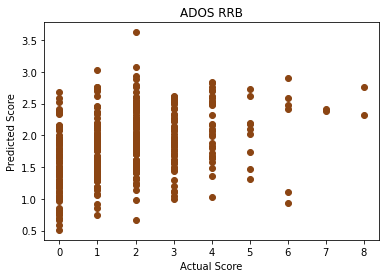

In [69]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='saddlebrown')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [70]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

10.334621253860165


In [71]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

10.122948350117777


In [72]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

10.197000015897705


In [73]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

11.16537100313434


Text(0.5, 0, 'Symptom')

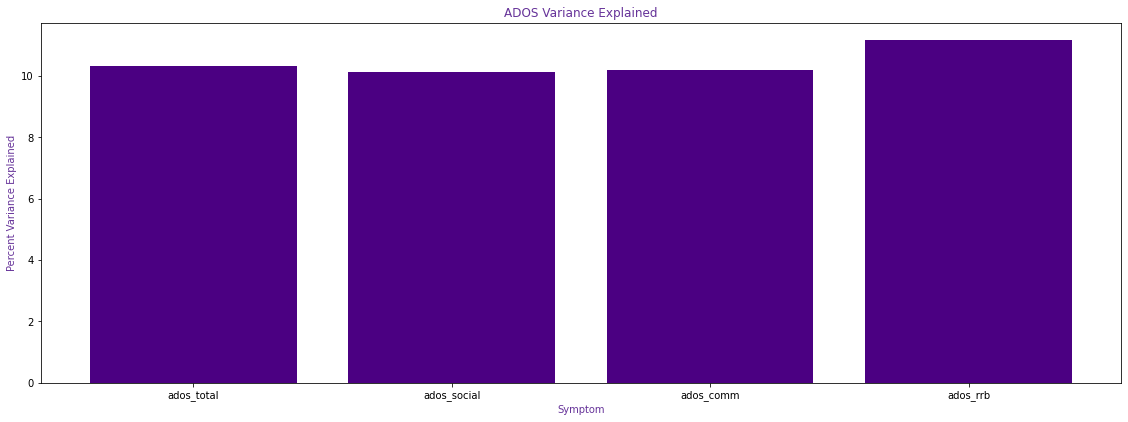

In [74]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='indigo')
plt.title('ADOS Variance Explained',color='rebeccapurple')
plt.ylabel('Percent Variance Explained',color='rebeccapurple')
plt.xlabel('Symptom',color='rebeccapurple')

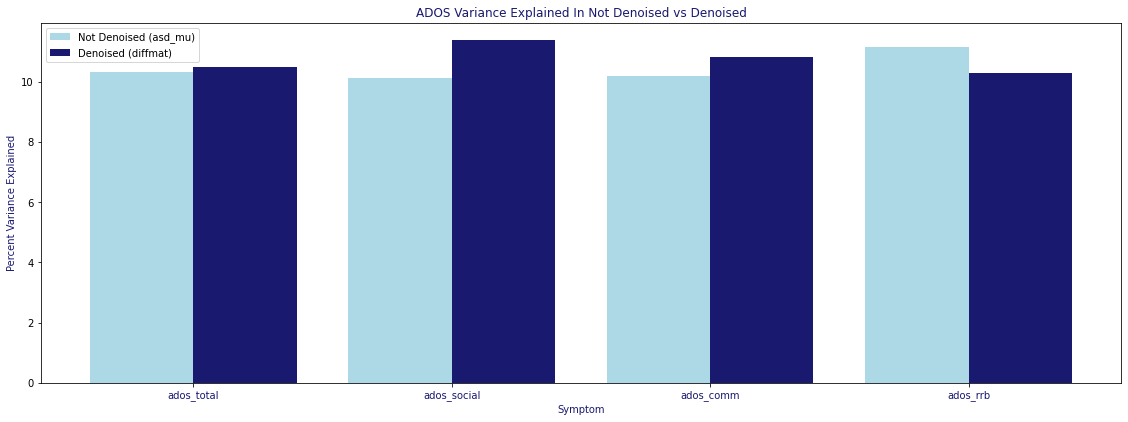

In [75]:
#variance explained of denoised vs not denoised
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
x_axis = np.arange(len(ados_label))

#not denoised is asd_mu
not_denoised = var_explained

#denoised is diffmat
denoised = [10.490944349217134,11.390782289066792,10.813751036531816,10.281563511295266]

#plot bar graph
plt.bar(x_axis-0.2,not_denoised,0.4,label='Not Denoised (asd_mu)',color='lightblue')
plt.bar(x_axis+0.2,denoised,0.4,label='Denoised (diffmat)',color='midnightblue')
plt.title('ADOS Variance Explained In Not Denoised vs Denoised',color='midnightblue')
plt.xticks(x_axis, ados_label,color='midnightblue')
plt.xlabel('Symptom',color='midnightblue')
plt.ylabel('Percent Variance Explained',color='midnightblue')
plt.legend()
plt.show()

In [76]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['TXNRD2','USP41','COMT','CRKL','TSSK2','DGCR5','TRMT2A','GP1BB','GSC2','ZDHHC8','SERPIND1','MED15','DGCR8','GNB1L','MRPL40','RTN4R','ARVCF','PRODH','RANBP1','KLHL22','DGCR6L','SCARF2','SLC7A4','SLC25A1','TBX1','CLDN5','HIRA','UFD1L','ZNF74','C22orf39','AIFM3','LZTR1','CLTCL1','CDC45','P2RX6','SNAP29','DGCR2']
print(column_total)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

TXNRD2,18.79204722987608
USP41,7.1534432453618315
COMT,-13.13230451212899
CRKL,-17.76670295506523
TSSK2,9.456575351836248
DGCR5,-1.0772398710578486
TRMT2A,2.1443425728326226
GP1BB,-2.038332350457153
GSC2,-5.119912839893446
ZDHHC8,-17.143364387812145
SERPIND1,16.624372979975377
MED15,-10.396080516504185
DGCR8,-10.977529007265856
GNB1L,23.261667453151627
MRPL40,9.081005189478356
RTN4R,30.661160755223346
ARVCF,-17.456018988222677
PRODH,6.6033222002089245
RANBP1,10.143923096400117
KLHL22,-30.414082152343408
DGCR6L,-13.01756842659461
SCARF2,-0.7395377899720834
SLC7A4,-8.627470340712918
SLC25A1,-5.415997644696377
TBX1,-24.19210310062071
CLDN5,17.098341512987147
HIRA,-4.058206015340928
UFD1L,0.2337904075302769
ZNF74,6.552319244005686
C22orf39,14.26699891576582
AIFM3,29.641239518002216
LZTR1,-27.650483599335697
CLTCL1,20.853164227950327
CDC45,-5.991665972446349
P2RX6,-2.1599898057148765
SNAP29,-13.996085918492934
DGCR2,-12.948536882168431


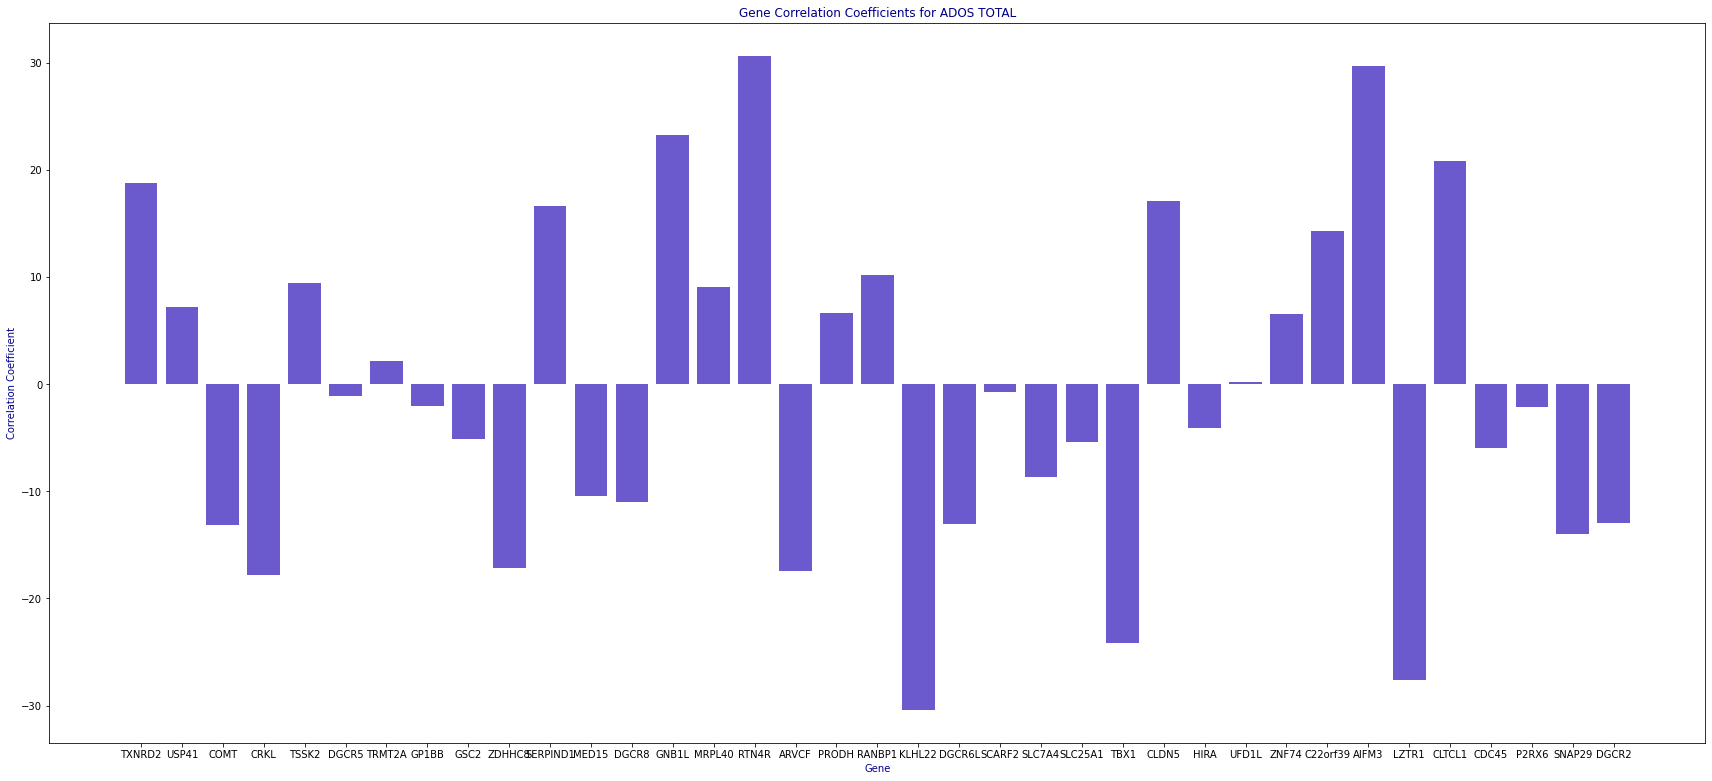

In [77]:
fig = plt.figure(figsize=(23,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='slateblue')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='darkblue')
plt.ylabel('Correlation Coefficient',color='darkblue')
plt.xlabel('Gene',color='darkblue')
plt.show()

In [78]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
print(column_comm)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

TXNRD2,6.790985214322727
USP41,0.5799126502432473
COMT,-4.103352919696297
CRKL,-5.911535262439079
TSSK2,9.551522665650634
DGCR5,5.469837238558401
TRMT2A,-3.7621958708045273
GP1BB,-2.4632753321718575
GSC2,-0.9045497941713218
ZDHHC8,-4.375983238569771
SERPIND1,4.007070030541175
MED15,-2.9562655545309915
DGCR8,-3.7319820990359966
GNB1L,4.9558366827492435
MRPL40,-1.4697338625123266
RTN4R,15.57305547063025
ARVCF,-2.1761774929477267
PRODH,-1.87014414171936
RANBP1,3.3319539365095574
KLHL22,-17.138232490270187
DGCR6L,-6.3845177442459935
SCARF2,-3.378753818524446
SLC7A4,1.0827900631999892
SLC25A1,-1.791490072270971
TBX1,-13.056555308744747
CLDN5,4.53363179749691
HIRA,-4.639259993568521
UFD1L,1.1949738065295328
ZNF74,1.763410362774748
C22orf39,10.050662224800814
AIFM3,6.604729383439404
LZTR1,-4.39844615514616
CLTCL1,5.456184961664987
CDC45,1.718560381058755
P2RX6,3.142656790567528
SNAP29,-6.470743630032906
DGCR2,-1.160184845931507


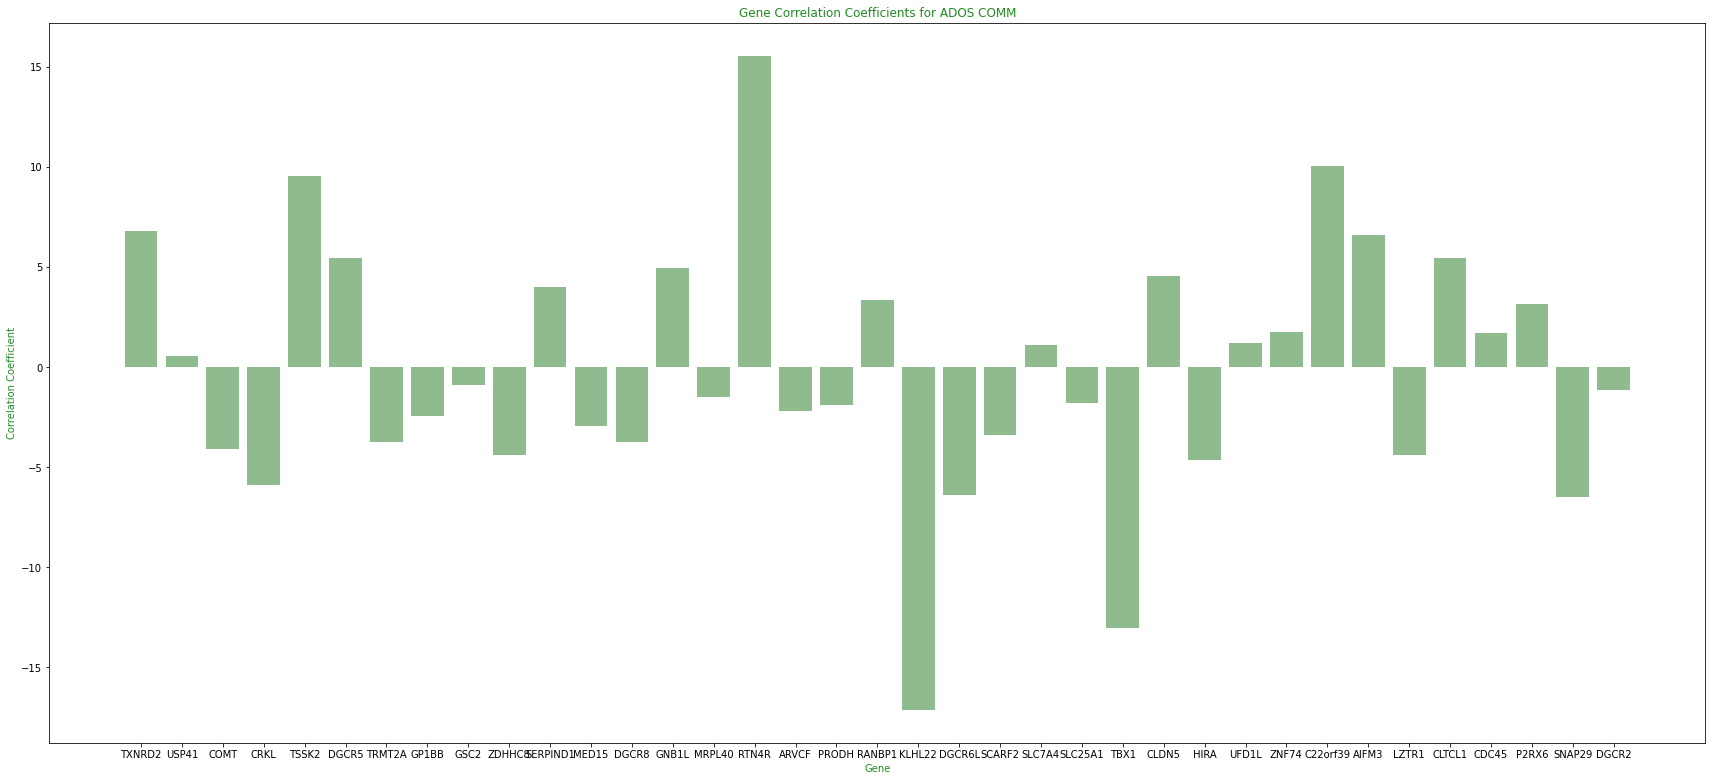

In [79]:
fig = plt.figure(figsize=(23,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='darkseagreen')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='forestgreen')
plt.ylabel('Correlation Coefficient',color='forestgreen')
plt.xlabel('Gene',color='forestgreen')
plt.show()

In [80]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
print(column_social)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

TXNRD2,11.064775964817164
USP41,4.975609597943595
COMT,-3.3036264752797964
CRKL,-12.614144779114815
TSSK2,2.7214325635495813
DGCR5,-6.096228398427367
TRMT2A,-0.574751934127446
GP1BB,0.7012681210050297
GSC2,-4.840113898690114
ZDHHC8,-13.794265793551538
SERPIND1,11.368880593404109
MED15,-6.902289637408542
DGCR8,-7.3360677007490445
GNB1L,17.493360115615797
MRPL40,7.528820830588447
RTN4R,11.52803175827277
ARVCF,-13.564461506935865
PRODH,3.4085196591785043
RANBP1,9.720746543472968
KLHL22,-22.426556659918752
DGCR6L,-7.328065166324118
SCARF2,1.9709413638428093
SLC7A4,-4.787723651785224
SLC25A1,-0.6774466476761797
TBX1,-13.383501713887147
CLDN5,17.464627370290984
HIRA,6.0004362171620444
UFD1L,-4.254833550334876
ZNF74,8.328359794553926
C22orf39,11.521601025496729
AIFM3,20.49516644443806
LZTR1,-16.480270372854637
CLTCL1,9.754086133727892
CDC45,-4.6279622432874055
P2RX6,-2.9539547134315174
SNAP29,-13.832255496038444
DGCR2,-7.622531642622153


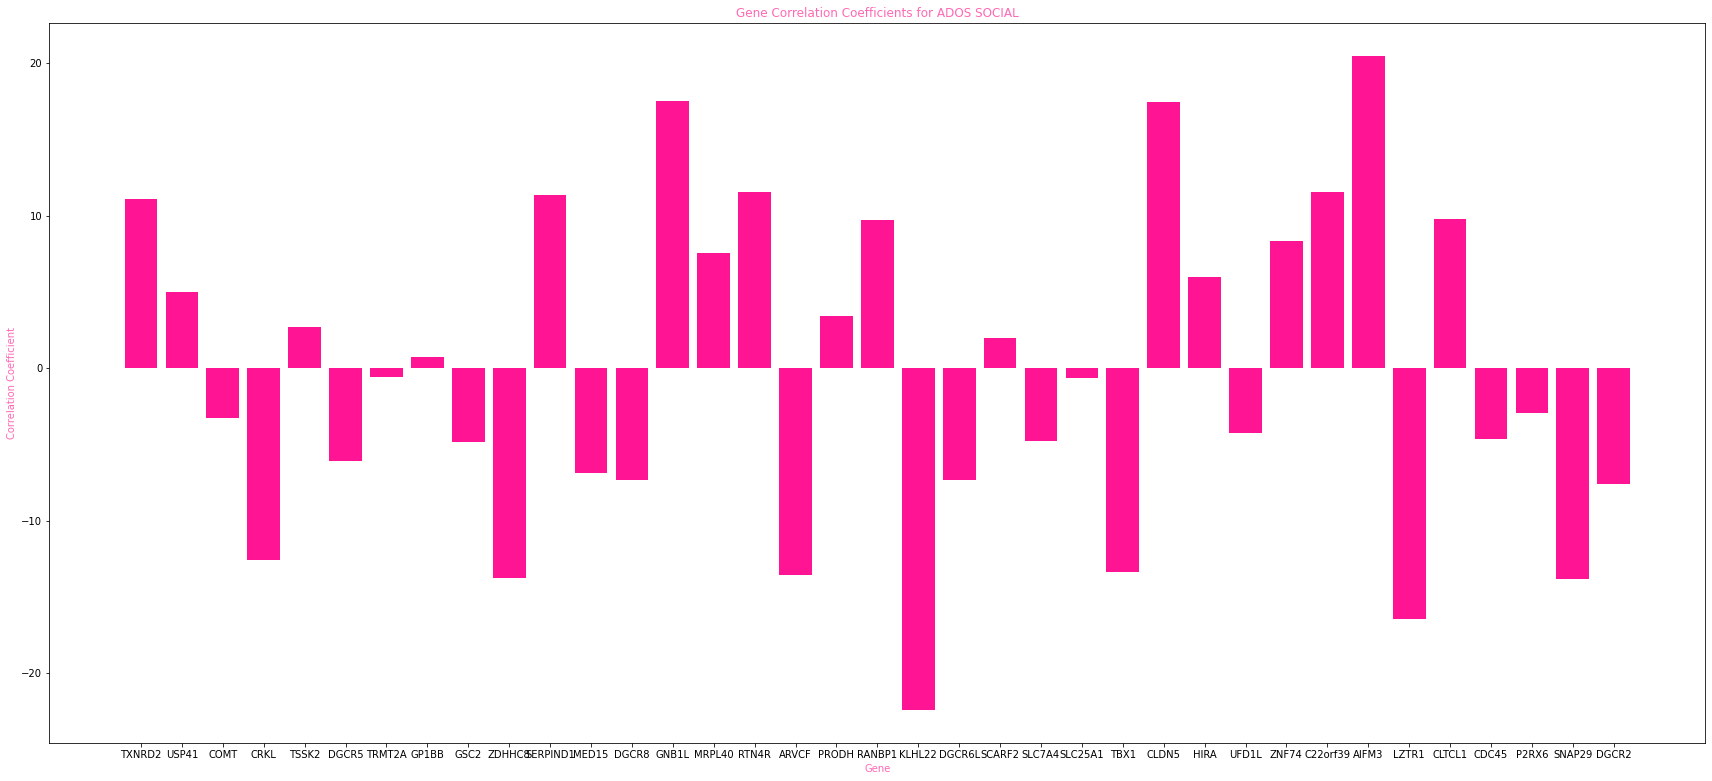

In [81]:
fig = plt.figure(figsize=(23,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='deeppink')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='hotpink')
plt.ylabel('Correlation Coefficient',color='hotpink')
plt.xlabel('Gene',color='hotpink')
plt.show()

In [82]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
print(column_rrb)
print()
for i in range(0,ngenes):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

TXNRD2,11.614279673878844
USP41,-1.3824454103275285
COMT,0.030908625315168824
CRKL,6.182699047517705
TSSK2,1.7574578773422302
DGCR5,-0.935341595772767
TRMT2A,5.619078401823806
GP1BB,1.980033529600552
GSC2,0.8706401845227999
ZDHHC8,-1.3690287399762489
SERPIND1,2.755280659343634
MED15,-4.216286375529052
DGCR8,-2.351131534804792
GNB1L,6.847209364877926
MRPL40,4.603689479948739
RTN4R,-3.117323521832946
ARVCF,-4.626104357018419
PRODH,-2.306825386498306
RANBP1,-1.2200810986468085
KLHL22,2.4013589778558213
DGCR6L,-2.611819042026678
SCARF2,5.167733957970549
SLC7A4,-6.990158145494653
SLC25A1,1.8501778616151336
TBX1,-10.375102683267935
CLDN5,-4.354959892416712
HIRA,-0.17404152554635796
UFD1L,4.4069301177976286
ZNF74,1.3669313603258912
C22orf39,8.208246714828244
AIFM3,11.133050293271392
LZTR1,-11.531209635612422
CLTCL1,3.2670036689665602
CDC45,-4.669656247351159
P2RX6,-2.5527417163411243
SNAP29,-2.1739883319913402
DGCR2,-6.020922233002295


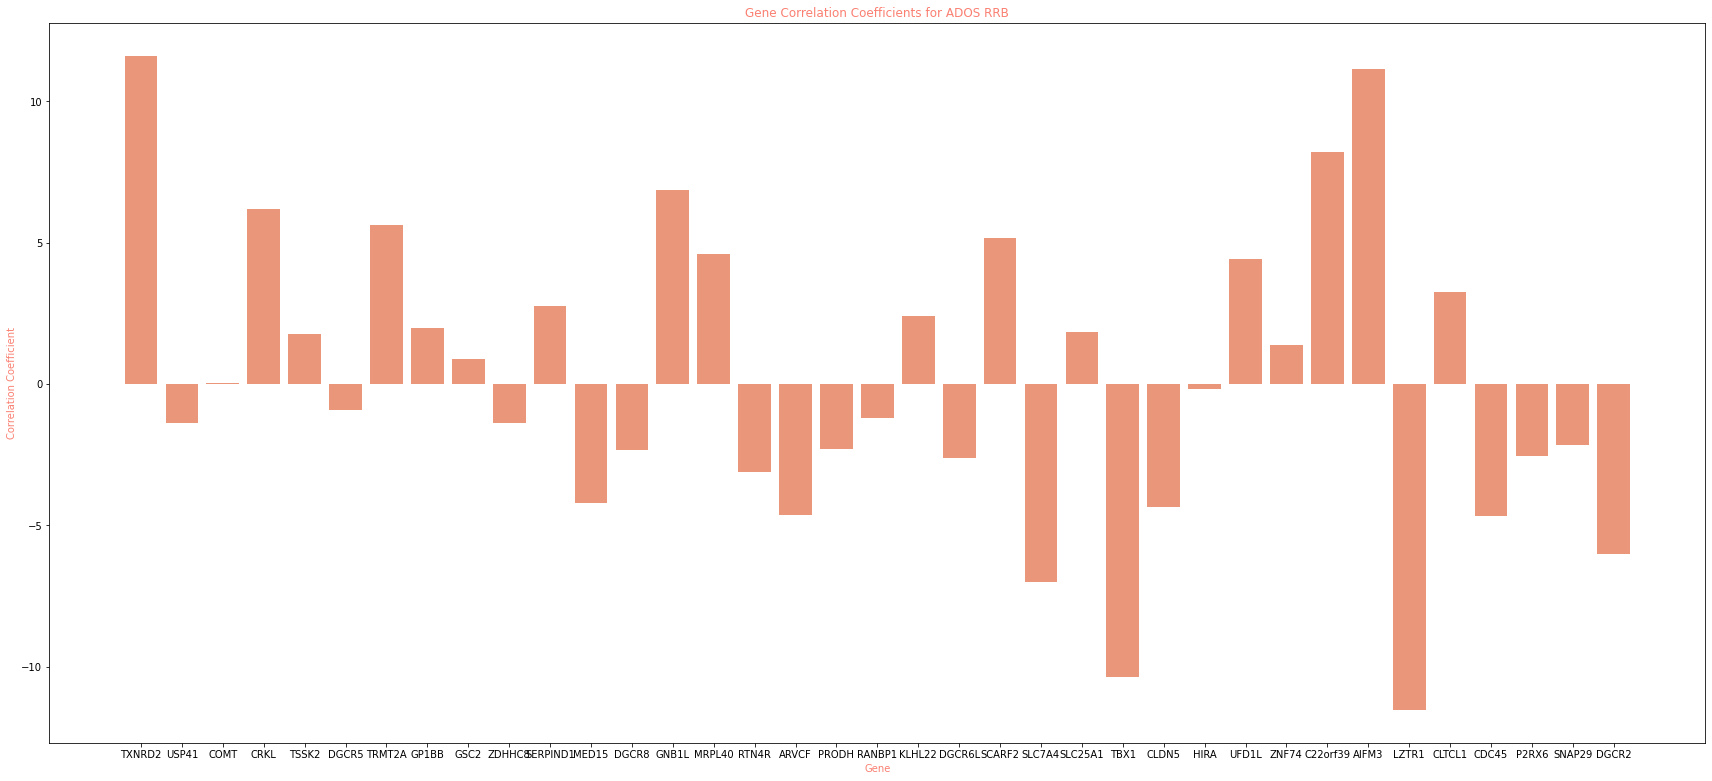

In [83]:
fig = plt.figure(figsize=(23,10))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='darksalmon')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='salmon')
plt.ylabel('Correlation Coefficient',color='salmon')
plt.xlabel('Gene',color='salmon')
plt.show()

In [84]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 38)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.218
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.184
Time:                        16:33:47   Log-Likelihood:                -1166.4
No. Observations:                 429   AIC:                             2409.
Df Residuals:                     391   BIC:                             2563.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7390   

In [85]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(30,10))
    plt.bar(xs_total,coef_total,color='plum')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='indigo')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

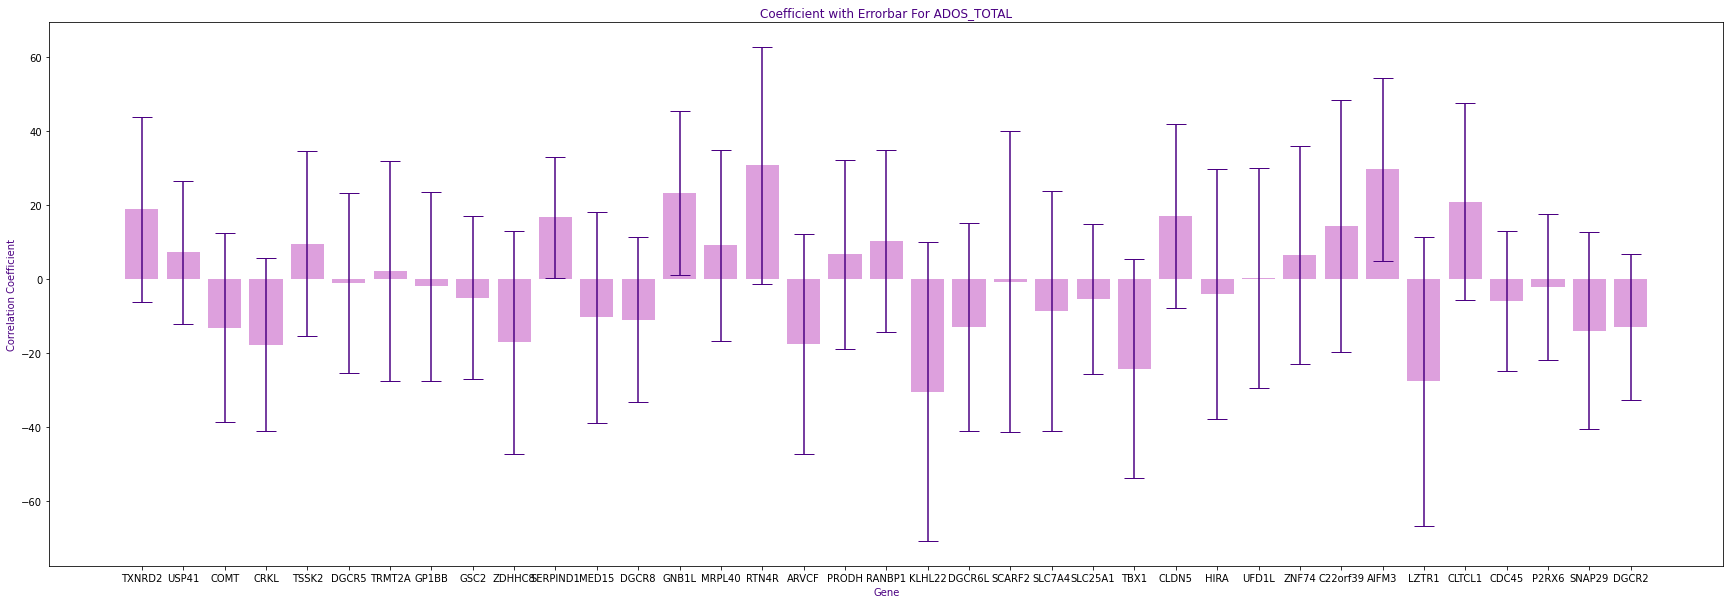

In [86]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='indigo')
plt.ylabel('Correlation Coefficient',color='indigo')
plt.xlabel('Gene',color='indigo')

In [87]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.135
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.276
Time:                        16:33:47   Log-Likelihood:                -752.68
No. Observations:                 411   AIC:                             1581.
Df Residuals:                     373   BIC:                             1734.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2255      0.504      6.40

In [88]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(30,10))
    plt.bar(xs_comm,coef_comm,color='silver')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='dimgrey')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

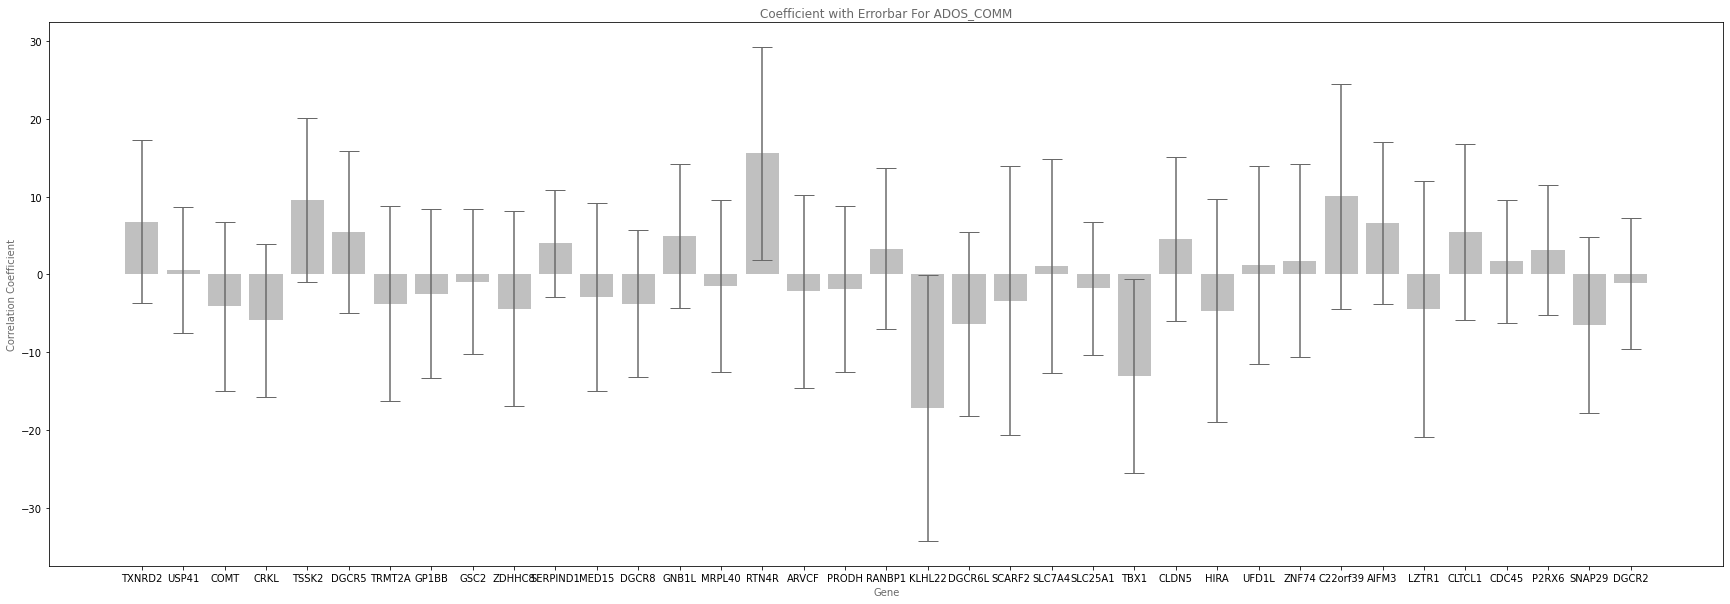

In [89]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='dimgrey')
plt.ylabel('Correlation Coefficient',color='dimgrey')
plt.xlabel('Gene',color='dimgrey')

In [90]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.148
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.261
Time:                        16:33:48   Log-Likelihood:                -976.11
No. Observations:                 412   AIC:                             2028.
Df Residuals:                     374   BIC:                             2181.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5517      0.862      7.

In [91]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(30,10))
    plt.bar(xs_social,coef_social,color='powderblue')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='midnightblue')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

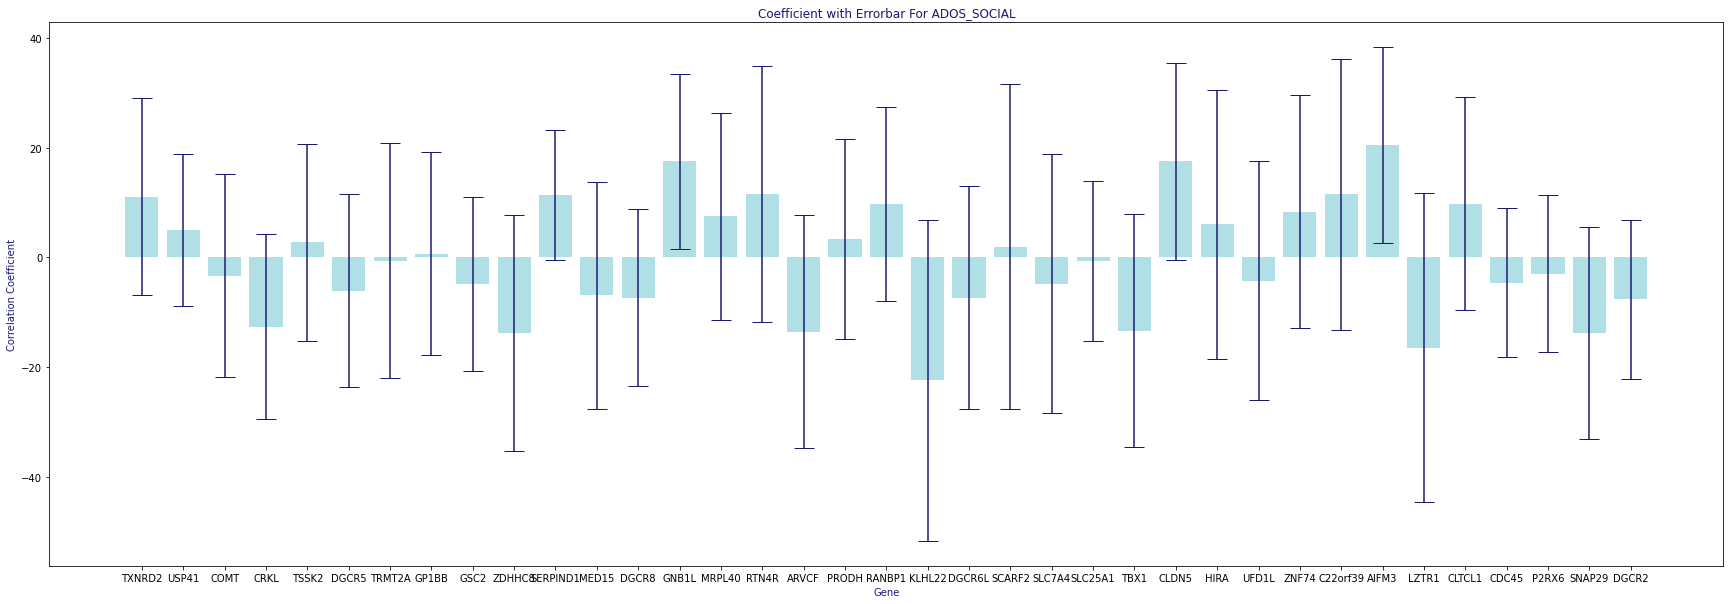

In [92]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='midnightblue')
plt.ylabel('Correlation Coefficient',color='midnightblue')
plt.xlabel('Gene',color='midnightblue')

In [93]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.145
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.266
Time:                        16:33:48   Log-Likelihood:                -669.06
No. Observations:                 375   AIC:                             1414.
Df Residuals:                     337   BIC:                             1563.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2770      0.517      4.405

In [94]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(30,10))
    plt.bar(xs_rrb,coef_rrb,color='darkseagreen')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='darkgreen')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

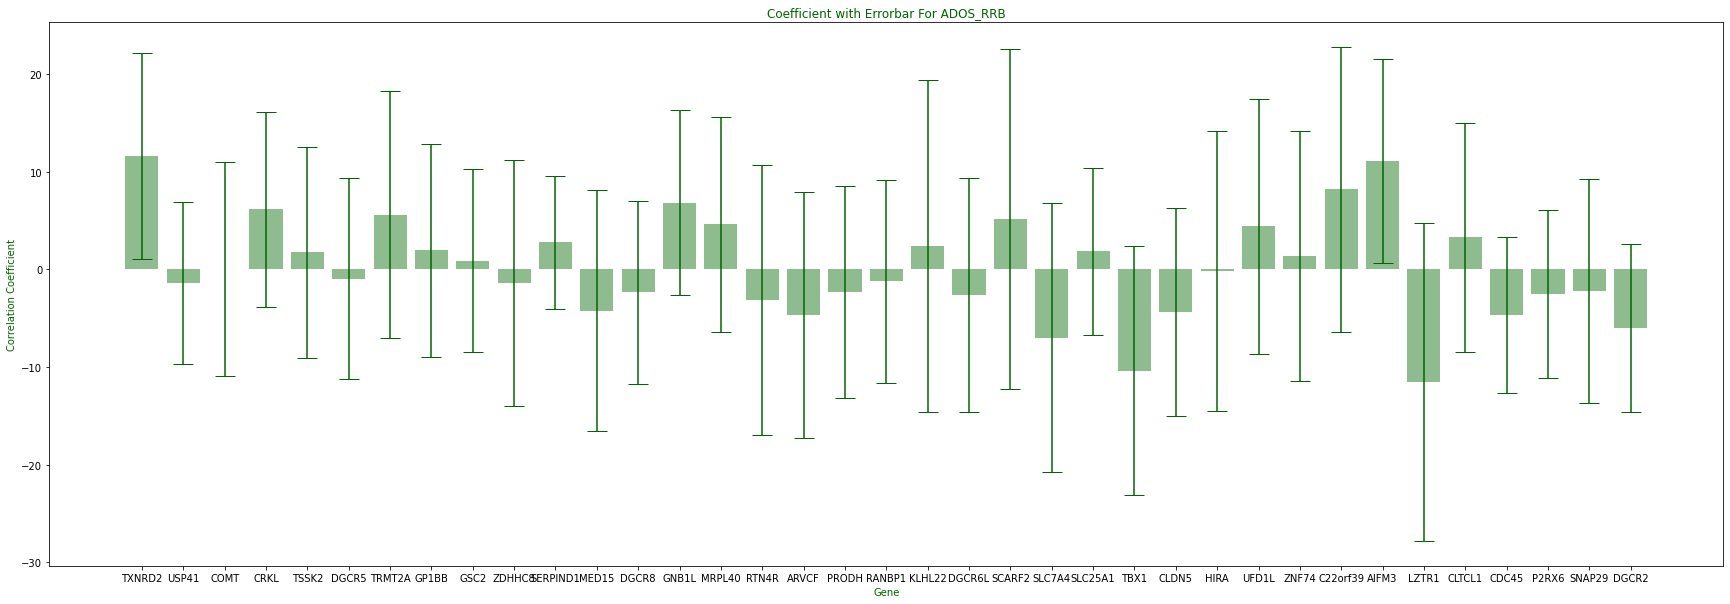

In [95]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='darkgreen')
plt.ylabel('Correlation Coefficient',color='darkgreen')
plt.xlabel('Gene',color='darkgreen')